### Predict Credit Card Fraud

Credit card fraud is one of the leading causes of identify theft around the world. In 2018 alone, over $24 billion were stolen through fraudulent credit card transactions. Financial institutions employ a wide variety of different techniques to prevent fraud, one of the most common being Logistic Regression.

In this project, you are a Data Scientist working for a credit card company. You have access to a dataset (based on a synthetic financial dataset), that represents a typical set of credit card transactions. transactions.csv is the original dataset containing 200k transactions. For starters, we're going to be working with a small portion of this dataset, transactions_modified.csv, which contains one thousand transactions. Your task is to use Logistic Regression and create a predictive model to determine if a transaction is fraudulent or not.

#### Load Data
##### Task 1
The file transactions_modified.csv contains data on 1000 simulated credit card transactions. Let's begin by loading the data into a pandas DataFrame named transactions. Take a peek at the dataset using .head() and you can use .info() to examine how many rows are there and what datatypes they are. How many transactions are fraudulent? Print your answer.

The isFraud column gives information on fraud versus not with 1 representing a fraudulent transaction and 0 representing non-fraudulent transaction. You can use the .sum() method to add the rows and the number you get will be the number of fraudulent transactions!

#### Clean the data
##### Task 2
Looking at the dataset, combined with our knowledge of credit card transactions in general, we can see that there are a few interesting columns to look at. We know that the `amount` of a given transaction is going to be important. Calculate summary statistics for this column. What does the distribution look like?

Use .describe() on a column like this: `pd['column'].describe()`

##### Task 3
We have a lot of information about the type of transaction we are looking at. Let's create a new column called `isPayment` that assigns a 1 when type is "PAYMENT" or "DEBIT", and a 0 otherwise.

You can create a new column for a pandas DataFrame like this: `df['new_column'] = value`

You can filter a DataFrame for specific values like this:
`df[df['filter_column'] == value]`


##### Task 4
Similarly, create a column called `isMovement`, which will capture if money moved out of the origin account. This column will have a value of 1 when type is either "CASH_OUT"  or "TRANSFER", and a 0 otherwise.

##### Task 5
With financial fraud, another key factor to investigate would be the difference in value between the origin and destination account. Our theory, in this case, being that destination accounts with a significantly different value could be suspect of fraud. Let's create a column called accountDiff with the absolute difference of the oldbalanceOrg and oldbalanceDest columns.

You can perform standard mathematical functions like +, -, *, and / with entire columns.

#### Select and Split the Data
##### Task 6
Before we can start training our model, we need to define our features and label columns. Our label column in this dataset is the `isFraud` field. Create a variable called `features` which will be an array consisting of the following fields:

- amount
- isPayment
- isMovement
- accountDiff

Also create a variable called `label` with the column `isFraud`.

You can assign an entire DataFrame or a pandas Series (one column) to a variable.


##### Taks 7
Split the data into training and test sets using sklearn's train_test_split() method. We'll use the training set to train the model and the test set to evaluate the model. Use a test_size value of 0.3.

#### Normalize the data
##### Task 8
Since sklearn's Logistic Regression implementation uses Regularization, we need to scale our feature data. Create a StandardScaler object, .fit_transform() it on the training features, and .transform() the test features.

#### Create and evaluate the Model
##### Task 9
Create a LogisticRegression model with sklearn and .fit() it on the training data.

Fitting the model find the best coefficients for our selected features so it acan modre accurately predict our label. We will start with the default threshold of 0.5.

Pass the newly normalized training features as the argument to your .fit() method.

##### Task 10
Run the model's `.score()` method on the training data and print the training score.

Scoring the model on the training data will process the training data through the trained model and will predict which transactions are fraudulent. The score returned is the percentage of correct classifications, or the accuracy.

Pass both the training features and label variables to the .score() method.

##### Task 11
Run the model's .score() method on the test data and print the test score.

Scoring the model on the test data will process the test data through the trained model and will predict which transactions are fraudulent. The score returned is the percentage of correct classifications, or the accuracy, and will be an indicator for the sucess of your model.

Pass both the test features and label variables to the .score() method.

##### Task 12
Print the coefficients for our model to see how important each feature column was for prediction. Which feature was most important? Least important?

#### Predict with the model
##### Task 13
Let's use our model to process more transactions that have gone through our systems. There are three numpy arrays pre-loaded in the workspace with information on new sample transactions under "New transaction data".

Create a fourth array, `your_transaction`, and add any transaction information you'd like. Make sure to enter all values as floats with a .!

##### Task 14
Combine the new transactions and your_transaction into a single numpy array called `sample_transactions`.

You can combine numpy arrays using the .stack() method.

##### Task 15
Since our Logistic Regression model was trained on scaled feature data, we must also scale the feature data we are making predictions on. Using the StandardScaler object created earlier, apply its .transform() method to sample_transactions and save the result to sample_transactions.

##### Task 16
Which transactions are fraudulent? Use your model's .predict() method on sample_transactions and print the result to find out.

Want to see the probabilities that led to these predictions? Call your model's .predict_proba() method on sample_transactions and print the result. The 1st column is the probability of a transaction not being fraudulent, and the 2nd column is the probability of a transaction being fraudulent (which was calculated by our model to make the final classification decision).

#### Script.py

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

transactions = pd.read_csv('transactions.csv')
print(transactions.head())
print(transactions.info())

fraudulent = transactions.isFraud.sum()
print(fraudulent)

# Summary statistics on amount column
transactions.amount.describe()

amount = transactions.amount


   step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     8  CASH_OUT  158007.12   C424875646           0.00            0.00   
1   236  CASH_OUT  457948.30  C1342616552           0.00            0.00   
2    37   CASH_IN  153602.99   C900876541    11160428.67     11314031.67   
3   331  CASH_OUT   49555.14   C177696810       10865.00            0.00   
4   250  CASH_OUT   29648.02   C788941490           0.00            0.00   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  
0  C1298177219       474016.32      1618631.97        0  
1  C1323169990      2720411.37      3178359.67        0  
2   C608741097      3274930.56      3121327.56        0  
3   C462716348            0.00        49555.14        0  
4  C1971700992        56933.09        86581.10        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   

(array([1.99669e+05, 2.33000e+02, 4.20000e+01, 2.10000e+01, 1.50000e+01,
        1.00000e+01, 4.00000e+00, 1.00000e+00, 0.00000e+00, 4.00000e+00]),
 array([       0.   ,  5204280.347, 10408560.694, 15612841.041,
        20817121.388, 26021401.735, 31225682.082, 36429962.429,
        41634242.776, 46838523.123, 52042803.47 ]),
 <BarContainer object of 10 artists>)

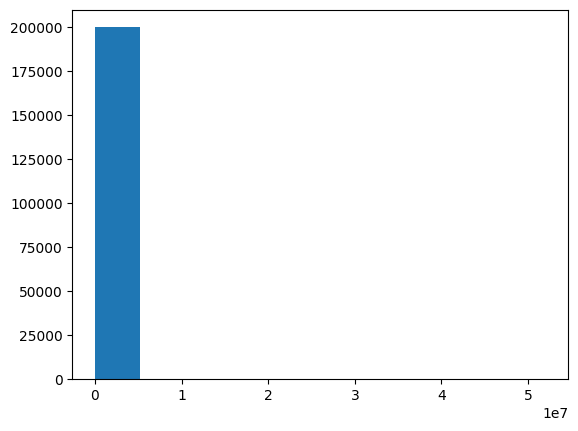

In [2]:
# Summary statistics for the amount column
transactions.amount.describe()

plt.hist(amount, bins=10)

In [3]:
# Create isPayment field
transactions['isPayment'] = 0
transactions['isPayment'][transactions['type'].isin(['PAYMENT', 'DEBIT'])] = 1

/tmp/ipykernel_2610/3098206547.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions['isPayment'][transactions['type'].isin(['PAYMENT', 'DEBIT'])] = 1


In [4]:
# Create isMovement field
transactions['isMovement'] = 0
transactions['isMovement'][transactions['type'].isin(['CASH_OUT', 'TRANSFER'])] = 1

/tmp/ipykernel_2610/3197595553.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions['isMovement'][transactions['type'].isin(['CASH_OUT', 'TRANSFER'])] = 1


In [5]:
# Create accountDiff field
transactions['accountDiff'] = abs(transactions['oldbalanceDest'] - transactions['oldbalanceOrg'])

In [6]:
# Create features and label variables
features = transactions[['amount', 'isPayment', 'isMovement', 'accountDiff']]
label = transactions['isFraud']

In [7]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    label,
                                                    test_size=0.3)

In [8]:
# Normalize the features variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Fit the model to the training data
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [10]:
# Score the model on the training data
print(model.score(X_train, y_train))

0.9985571325509468


In [11]:
# Score the model on the test data
print(model.score(X_test, y_test))

0.9986


In [12]:
# Print the model coefficients
print(model.coef_)

[[ 0.24668017 -0.7395983   2.26139474 -0.71406233]]


In [13]:
# New transaction data
transaction1 = np.array([123456.78, 0.0, 1.0, 54670.1])
transaction2 = np.array([98765.43, 1.0, 0.0, 8524.75])
transaction3 = np.array([543678.31, 1.0, 0.0, 510025.5])

# Create a new transaction
your_transaction = np.array([6472.54, 1.0, 0.0, 55901.23])

In [14]:
# Combine new transactions into a single array
sample_transactions = np.stack((transaction1,transaction2,transaction3,your_transaction))

In [15]:
# Normalize the new transactions
sample_transactions = scaler.transform(sample_transactions)

/home/oldoc/OpenAI/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [16]:
# Predict fraud on the new transactions
print(model.predict(sample_transactions))

[0 0 0 0]


In [17]:
# Show probabilities on the new transactions
print(model.predict_proba(sample_transactions))

[[9.96530036e-01 3.46996409e-03]
 [9.99992331e-01 7.66884254e-06]
 [9.99991661e-01 8.33887946e-06]
 [9.99992668e-01 7.33166830e-06]]
